## 線形モデル

### 単回帰モデル


In [1]:
# 気温のデータを作成
temperature <- seq(18, 40, 4)
# アイスクリームの売り上げのデータを作成
icecream_sales <- c(28, 45, 72, 82, 96, 100)

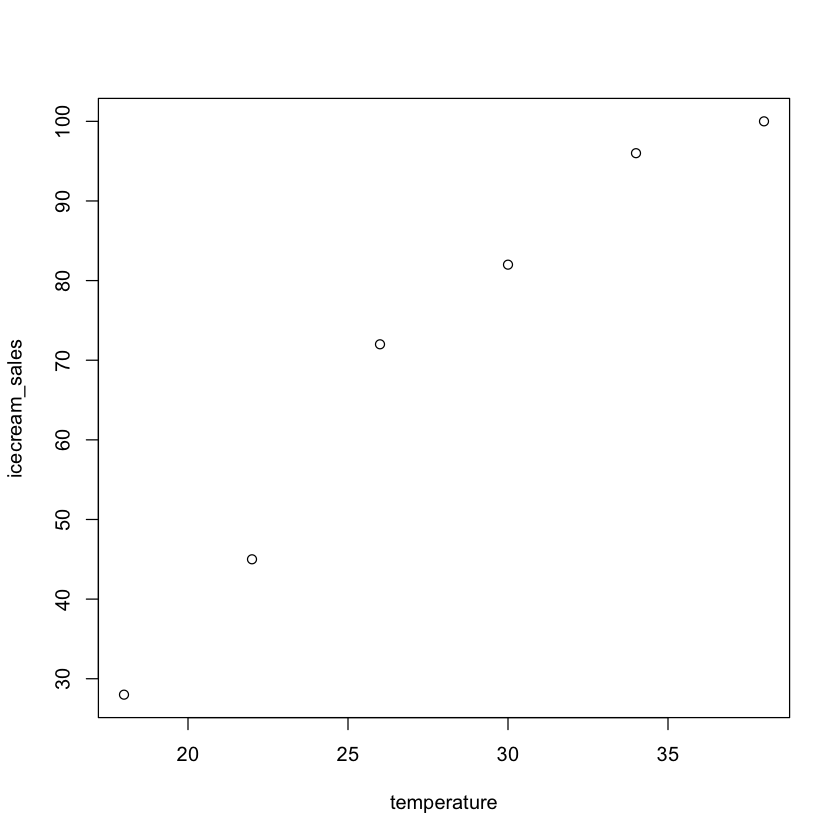

In [2]:
# 散布図の作成
plot(temperature, icecream_sales)

In [3]:
# 単回帰モデルの構築
# lm()関数の引数に 目的変数 ~ 説明変数 の形式で指定する
model <- lm(formula = icecream_sales ~ temperature)

In [4]:
# intercept... 切片
# coefficient... 傾き（係数）
coefficients(model)

(Intercept) temperature 
 -34.100000    3.735714

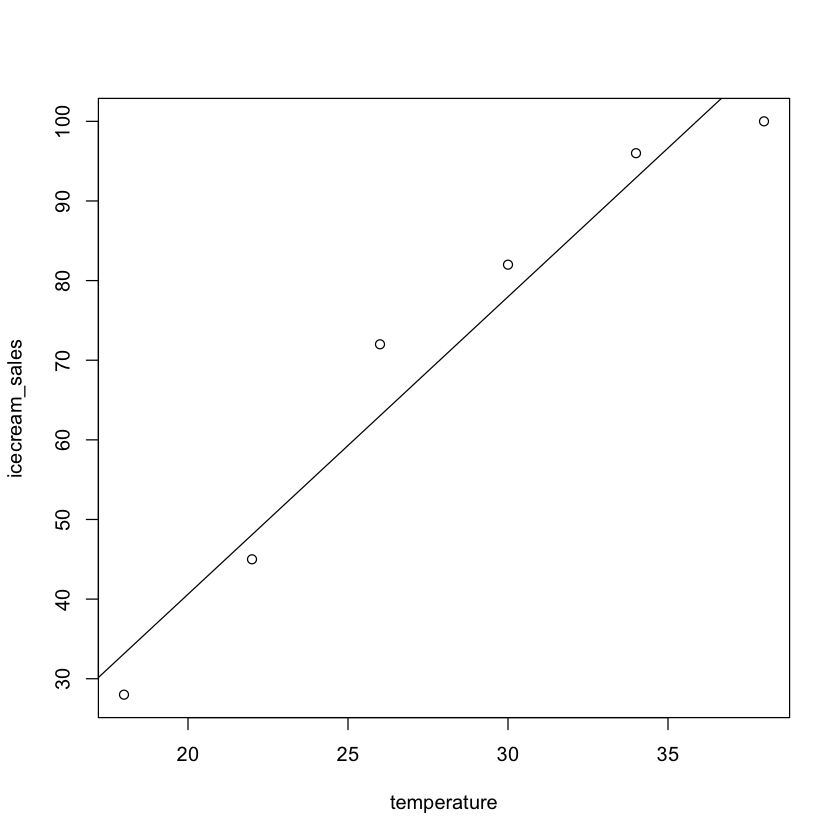

In [5]:
# 回帰直線の追加
plot(temperature, icecream_sales)
abline(model)

In [6]:
# 新たなデータに対する予測
predict(model, data.frame(temperature = 30))

1 
77.97143

In [7]:
# p値を含む結果の出力
summary(model)


Call:
lm(formula = icecream_sales ~ temperature)

Residuals:
     1      2      3      4      5      6 
-5.143 -3.086  8.971  4.029  3.086 -7.857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -34.1000    12.2987  -2.773 0.050194 .  
temperature   3.7357     0.4267   8.754 0.000938 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.14 on 4 degrees of freedom
Multiple R-squared:  0.9504,	Adjusted R-squared:  0.938 
F-statistic: 76.64 on 1 and 4 DF,  p-value: 0.0009384


### 重回帰モデル


In [8]:
# 重回帰モデルの構築
humidity <- c(0.65, 0.8, 0.75, 0.85, 0.9, 0.8)
wind_speed <- c(2, 3, 4, 6, 3, 1)
model <- lm(icecream_sales ~ temperature + humidity + wind_speed)

coefficients(model)

summary(model)

(Intercept) temperature    humidity  wind_speed 
 -43.030028    3.829201   -3.741047    2.928650


Call:
lm(formula = icecream_sales ~ temperature + humidity + wind_speed)

Residuals:
     1      2      3      4      5      6 
-1.321 -2.006  6.562 -4.238  3.418 -2.415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -43.0300    31.6517  -1.359   0.3070  
temperature   3.8292     0.6488   5.902   0.0275 *
humidity     -3.7410    59.8826  -0.062   0.9559  
wind_speed    2.9287     2.1062   1.391   0.2989  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.493 on 2 degrees of freedom
Multiple R-squared:  0.9795,	Adjusted R-squared:  0.9487 
F-statistic: 31.85 on 3 and 2 DF,  p-value: 0.0306


## 一般化線形モデル


In [9]:
# 『データ解析のための統計モデリング入門』（久保2012）からデータを利用
# 植物の種子数と体サイズについての架空のデータ
d <- 
  readr::read_csv("https://kuboweb.github.io/-kubo/stat/iwanamibook/fig/poisson/data3a.csv",
                  col_types = "ddc") |> 
  dplyr::mutate(f = dplyr::case_match(
    f,
    "C" ~ "Control",
    "T" ~ "Treatment"))

head(d)
# y... 植物の種子数
# x... 体サイズ
# f... 施肥処理（Control... 処理なし、Treatment... 処理あり）

y,x,f
<dbl>,<dbl>,<chr>
6,8.31,Control
6,9.44,Control
6,9.50,Control
12,9.07,Control
10,10.16,Control
4,8.32,Control


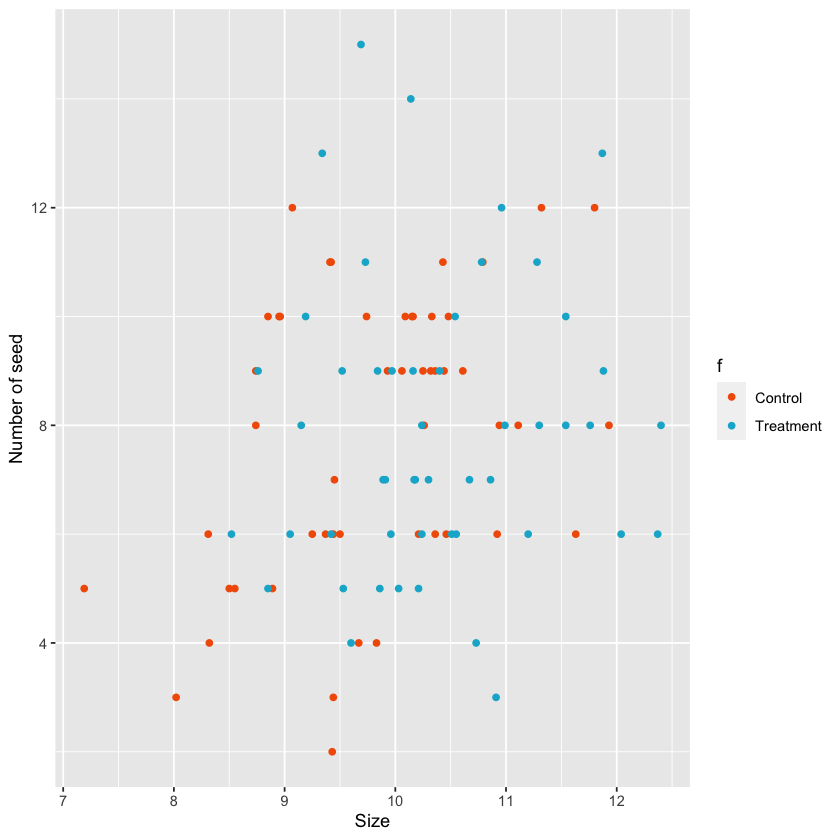

In [10]:
#| label: 体サイズと種子数の散布図
library(ggplot2)
ggplot(d) +
  aes(x, y) +
  geom_point(aes(color = f)) +
  xlab("Size") +
  ylab("Number of seed") +
  scale_color_manual(values = c("Control" = "#f25d02", 
                                "Treatment" = "#0cb3d1"))

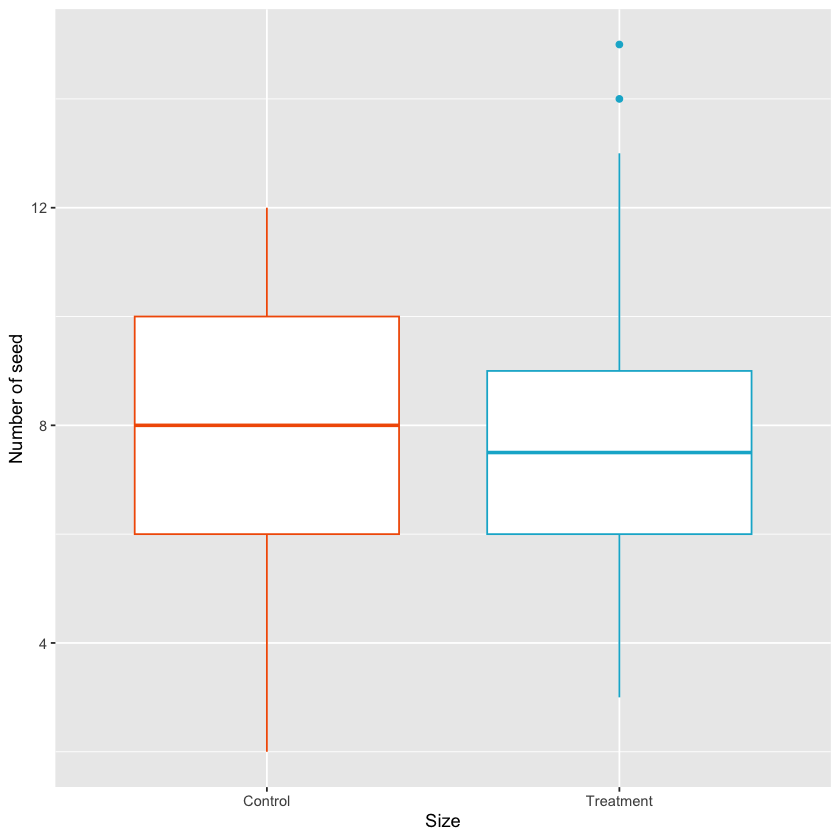

In [11]:
#| label: 施肥処理の違いに応じた種子数の箱ひげ図
ggplot(d) +
  aes(f, y) +
  geom_boxplot(aes(color = f),
               show.legend = FALSE) +
  xlab("Size") +
  ylab("Number of seed") +
  scale_color_manual(values = c("Control" = "#f25d02", 
                                "Treatment" = "#0cb3d1"))

In [12]:
#| label: 施肥処理の違いに応じた種子数の蜂群図（箱ひげ図の改良）
#| eval: false
#| echo: false
library(ggbeeswarm)
ggplot(d) +
  aes(f, y) +
  geom_quasirandom(aes(color = f),
               show.legend = FALSE) +
  xlab("Size") +
  ylab("Number of seed") +
  scale_color_manual(values = c("Control" = "#f25d02", 
                                "Treatment" = "#0cb3d1"))

In [13]:
model <- glm(formula = y ~ x + f, data = d, family = poisson)
summary(model)


Call:
glm(formula = y ~ x + f, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3977  -0.7337  -0.2023   0.6795   2.4317  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.26311    0.36963   3.417 0.000633 ***
x            0.08007    0.03704   2.162 0.030620 *  
fTreatment  -0.03200    0.07438  -0.430 0.667035    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.808  on 97  degrees of freedom
AIC: 476.59

Number of Fisher Scoring iterations: 4


In [14]:
predict(model, newdata = data.frame(x = 12, f = "Control"), type = "response")
predict(model, newdata = data.frame(x = 12, f = "Treatment"), type = "response")

1 
9.244014

1 
8.952894